In [1]:
from __future__ import print_function, division, absolute_import
import os
import sys
sys.path.insert(0, "C:\\Users\\Matt\\Desktop\\orbithunter\\")
from orbithunter import *
import numpy as np
import itertools
from math import pi
import matplotlib.pyplot as plt
%matplotlib inline
import time
import pandas as pd

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
tmp = converge(read_h5('OrbitKS_L26p931_T41p266.h5'), method='lstsq')

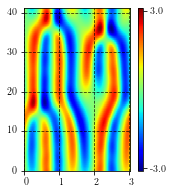

In [6]:
tmp.orbit.plot()

In [2]:
symbol_block = np.array([[1,2,0],[0,1,1],[2,1,1]])

In [3]:
symbol_block = np.array([[1, 2, 0], [0, 1, 1], [2, 1, 1]])
o = tile(symbol_block)
test = converge(o, verbose=True)

ValueError: cannot reshape array of size 9 into shape (3,3,64,64)

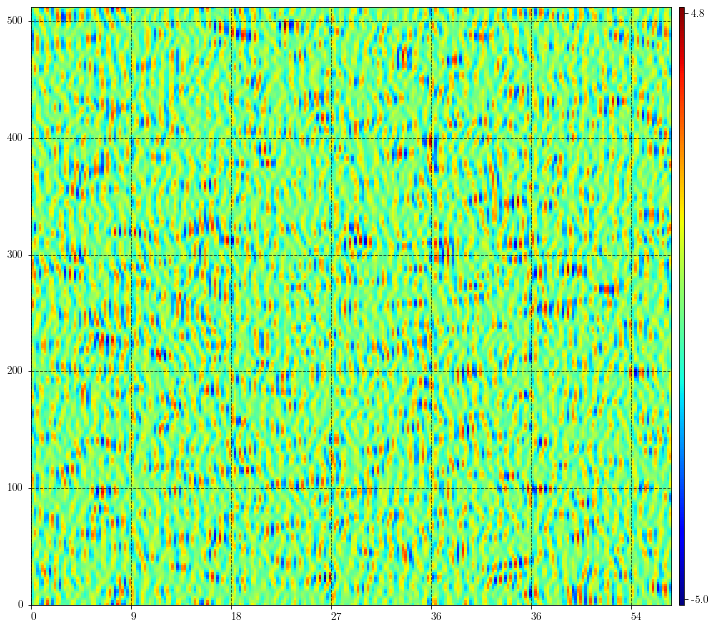

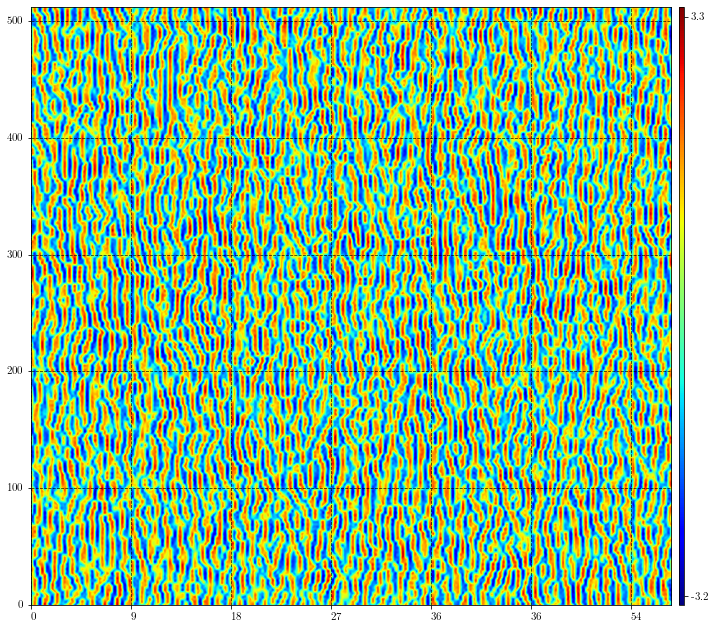

In [66]:
N = 256
M = 256
T = 512
L = 512
n, m = int(N // 2) - 1, int(M // 2) - 1
sms = int(L / (2*pi*np.sqrt(2)))
tms = int(np.sqrt(T/10))

sigma_time = 20
sigma_space = 15

np.random.seed(0)
tester = OrbitKS(state=4*np.random.randn(N,M), state_type='field', T=T, L=L).convert(to='modes')
tester.state = np.random.randn(*tester.state.shape)
space = np.abs((tester.L / (2 * pi)) * tester.elementwise_dxn(tester.parameters['dx']))
time = np.abs((tester.T / (2 * pi)) * tester.elementwise_dtn(tester.parameters['dt']))

mollifier = np.exp(-(space-sms)**2/(2*sigma_space**2)-(time-tms)**2/(2*sigma_time**2))

modes = 3*np.multiply(mollifier, tester.state)
test_orbit = OrbitKS(state=modes, state_type='modes', T=tester.T, L=tester.L)

o = OrbitKS(state=np.sign(test_orbit.convert(to='field').state) * np.abs(test_orbit.convert(to='field').state)**(1./3.),
                                                                      state_type='field', T=512, L=512).rescale(2.5)




In [67]:
o.parameters['field_shape']

(256, 256)

In [60]:
from orbithunter.discretization import parameter_based_discretization 
# also accepts N and M as kwargs
temporary_param_dict = {'T': T, 'L': L}
N, M = parameter_based_discretization(temporary_param_dict)
n, m = int(N // 2) - 1, int(M // 2) - 1

# I think this is the easiest way to get symmetry-dependent Fourier mode arrays' shapes.
# power = 2 b.c. odd powers not defined for spacetime modes for discrete symmetries.
space_ = np.sqrt((L / (2*pi))**2 * np.abs(o2.elementwise_dxn(parameters['dx'],
                                                                    power=2))).astype(int)
time_ = (T / (2*pi)) * np.abs(o2.elementwise_dtn(parameters['dt']))
np.random.seed(0)
random_modes = np.random.randn(*o2.parameters['mode_shape'])
# piece-wise constant + exponential
# linear-component based. multiply by preconditioner?
# random modes, no modulation.

gaussian_modulator = np.exp(-((space_ - xscale)**2/(2*xvar)) - ((time_ - tscale)**2 / (2*tvar)))
modes = np.multiply(gaussian_modulator, random_modes)

NameError: name 'parameters' is not defined

In [61]:
N = 256
M = 256
T = 512
L = 512
n, m = int(N // 2) - 1, int(M // 2) - 1
sms = int(L / (2*pi*np.sqrt(2)))
tms = int(np.sqrt(T/10))

sigma_time = 20
sigma_space = 15

np.random.seed(0)
tester = OrbitKS(state=4*np.random.randn(N,M), state_type='field', T=T, L=L).convert(to='modes')
tester.state = np.random.randn(*tester.state.shape)
space = np.abs((tester.L / (2 * pi)) * tester.elementwise_dxn(tester.parameters['dx']))
time = np.abs((tester.T / (2 * pi)) * tester.elementwise_dtn(tester.parameters['dt']))

mollifier = np.exp(-(space-sms)**2/(2*sigma_space**2)-(time-tms)**2/(2*sigma_time**2))

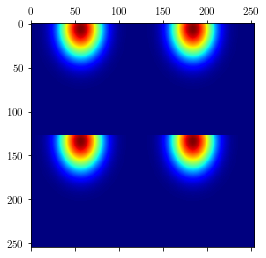

In [63]:
plt.matshow(np.log10(np.abs(mollifier)+1), cmap='jet')
plt.show()

In [ ]:
modes = 3*np.multiply(mollifier, tester.state)
test_orbit = OrbitKS(state=modes, state_type='modes', T=tester.T, L=tester.L)
test_orbit.plot()

o = OrbitKS(state=np.sign(test_orbit.convert(to='field').state) * np.abs(test_orbit.convert(to='field').state)**(1./3.),
                                                                      state_type='field', T=512, L=512).rescale(2.5)


o.plot(padding=True)

In [64]:
L = 512
T = 512

sms = int(L / (2*pi*np.sqrt(2)))
tms = int(np.sqrt(T/10))

sigma_time = 20
sigma_space = 15

xscale = int(L / (2*pi*np.sqrt(2)))
tscale = int(np.sqrt(T/10))
tvar = 20**2
xvar = 15**2

o2 = OrbitKS(state_type='field', T=512, L=512, seed=0, spectrum='gaussian',
                            xscale=xscale, tscale=tscale, tvar=tvar, xvar=xvar)
o2 = (o2).rescale(0.33, method='power').rescale(2.5, method='absolute')

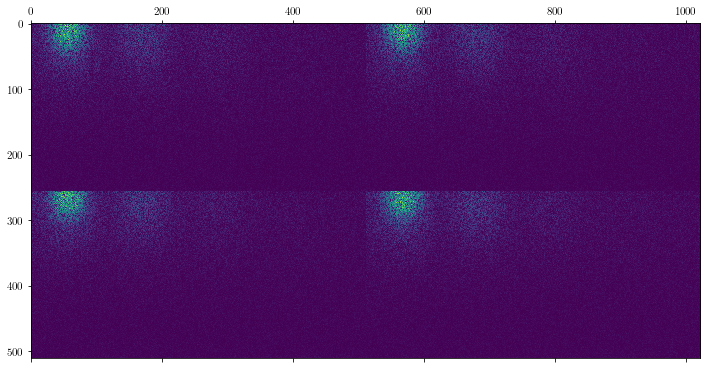

In [65]:
fig, ax = plt.subplots(figsize=(12,12))
ax.matshow(np.log10(np.abs(o2.convert(to='modes').state)+1))
plt.show()

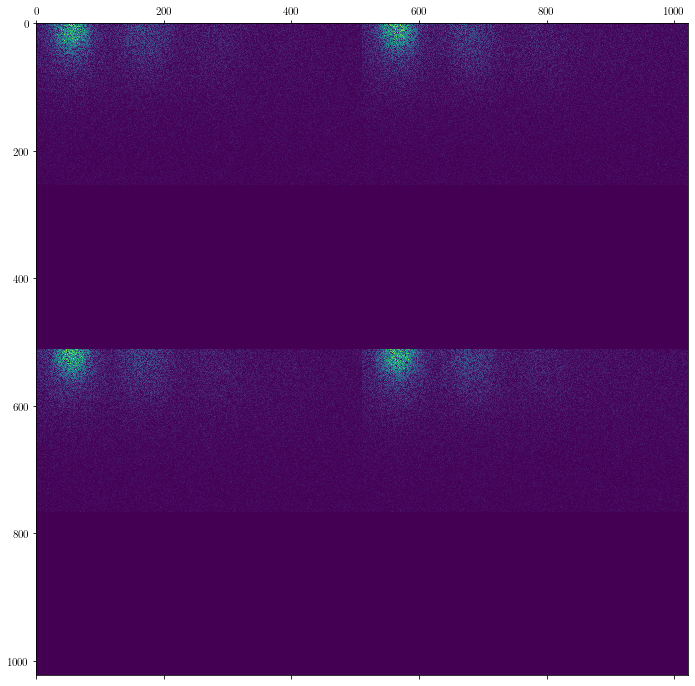

In [51]:
fig, ax = plt.subplots(figsize=(12,12))
ax.matshow(np.log10(np.abs(rediscretize(o2, new_shape=(1024, 1024)).convert(to='modes').state)+1))
plt.show()

In [47]:
o2 = rediscretize(o2, new_shape=(256, 256))
o2 = rediscretize(o2, new_shape=(1024, 1024))

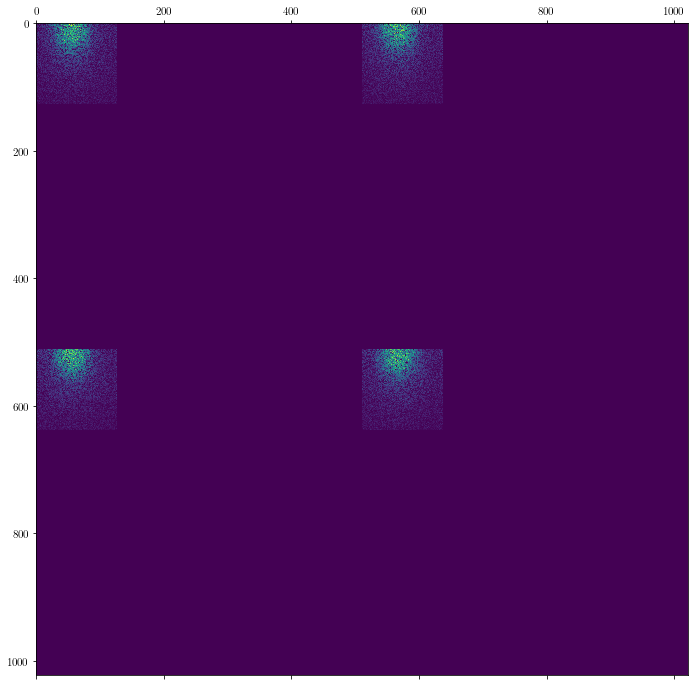

In [48]:
fig, ax = plt.subplots(figsize=(12,12))
ax.matshow(np.log10(np.abs(rediscretize(o2, new_shape=(1024, 1024)).convert(to='modes').state)+1))
plt.show()

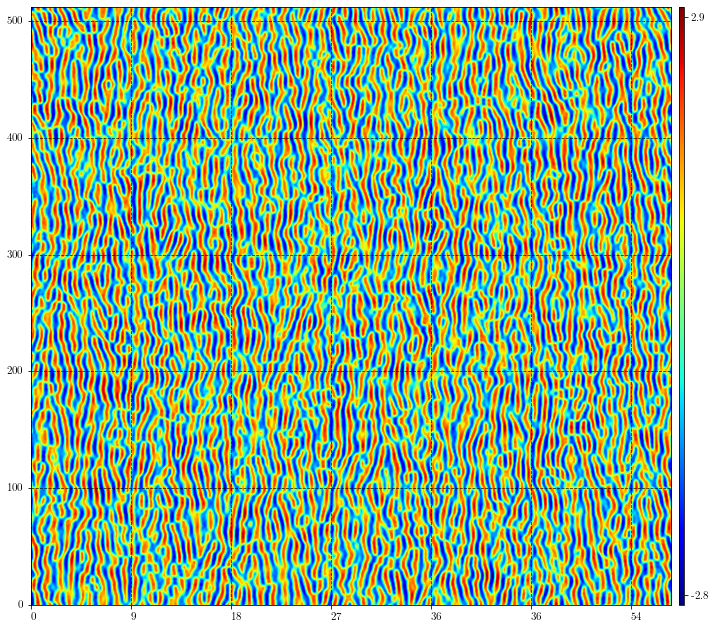

In [49]:
o2.plot(padding=True)

In [45]:
o2 = rediscretize(o2, new_shape=(256, 256))
o2.plot(padding=True)

KeyboardInterrupt: 

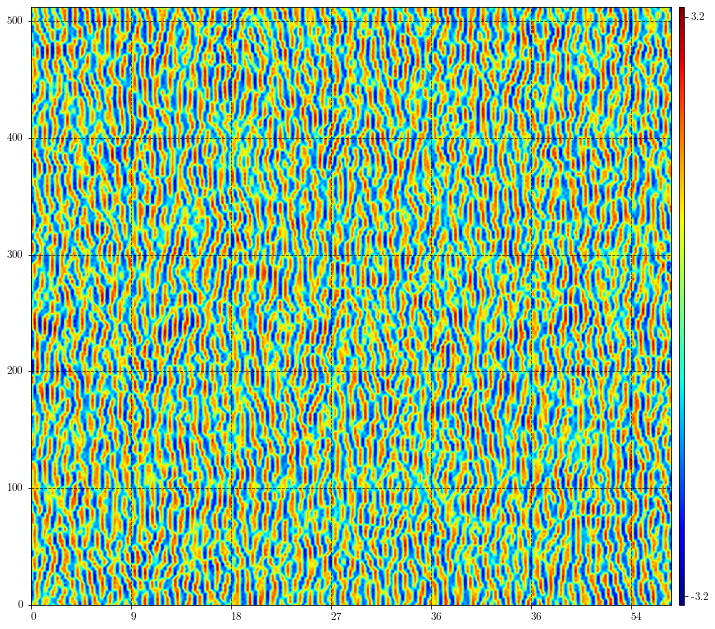

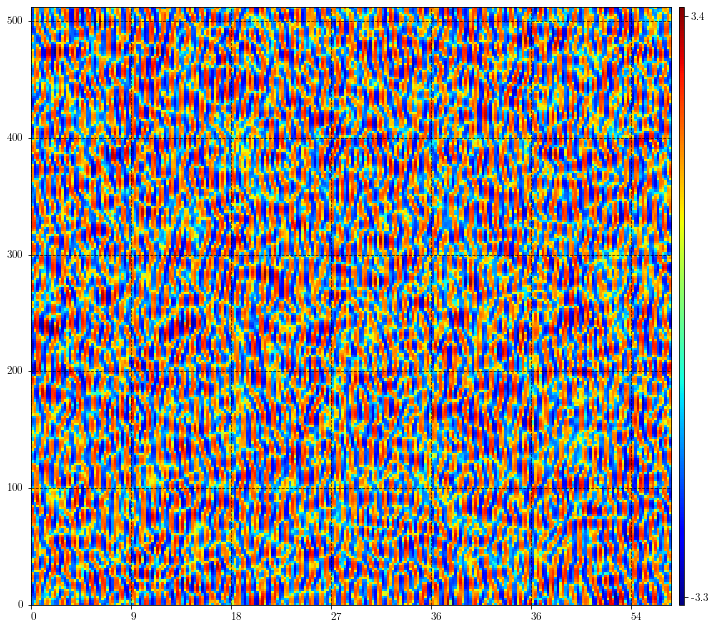

In [51]:
good_large_guess2.rescale(1./3., rescaling_method='power').rescale(3.5, rescaling_method='absolute').plot(padding=False)